In [1]:
import cwgp
import warnings
warnings.filterwarnings('ignore')

print(cwgp)

from cwgp.cwgp import CWGP
from cwgp.transformations import sal,sa,asinh,box_cox
import seaborn as sns
import autograd.numpy as np

<module 'cwgp' from '/home/chen/work/venv/lib/python3.6/site-packages/cwgp/__init__.py'>


In [20]:
betas = np.random.exponential(scale=5,size=100)
betas = betas[np.newaxis].reshape(-1,1)


In [21]:
betas

array([[ 4.29936038],
       [ 6.80865095],
       [ 6.44189171],
       [ 8.47495948],
       [ 2.93318307],
       [ 7.49799932],
       [ 3.83191499],
       [ 0.1743573 ],
       [ 5.95389528],
       [ 2.40133771],
       [ 2.52513753],
       [ 0.87987696],
       [ 3.51232969],
       [ 8.36872134],
       [ 6.24219948],
       [ 0.79394724],
       [ 8.75593972],
       [ 2.33746689],
       [20.84953571],
       [12.55188549],
       [ 3.64283691],
       [ 2.45437735],
       [13.696001  ],
       [ 5.71642092],
       [ 1.39244095],
       [ 3.83761173],
       [17.08478015],
       [ 1.3166657 ],
       [ 5.02370828],
       [ 7.52666246],
       [ 1.54532516],
       [19.30426499],
       [ 2.21967383],
       [ 6.2723159 ],
       [ 6.34814996],
       [ 2.2917761 ],
       [ 7.10359625],
       [ 2.03726187],
       [ 1.7106131 ],
       [ 7.25220139],
       [ 0.10228151],
       [ 1.87727868],
       [ 3.71130815],
       [ 1.240292  ],
       [ 1.08683693],
       [ 2

In [22]:
betas.shape

(100, 1)

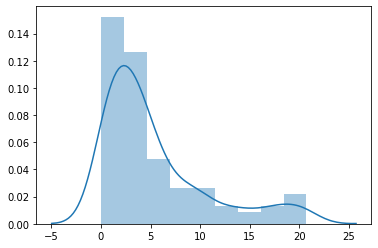

In [4]:
sns.distplot(betas)

# SAL d=1

In [23]:
compgp = CWGP(sal, betas, transformations=1)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

ValueError: `f0` passed has more than 1 dimension.

# Arcsinh d=1

In [ ]:
compgp = CWGP(asinh, betas, transformations=1)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Sinh-Arcsinh d=3

In [ ]:
compgp = CWGP(sa, betas, transformations=3)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Box-Cox d=2

In [ ]:
compgp = CWGP(box_cox, betas, transformations=2)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)